In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
import sklearn


In [31]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10



In [10]:
# Read the raw data
raw_data = pd.read_csv('FFG_Hackathon_Region_Level_Data.csv')

In [11]:
raw_data.head()

,Year,Region Name,Region Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
0,2007,Arab World,ARB,4.100190e+06,11235331.0,11291048.90,1.762740,89.984788,3.963724,61.248601,...,1.620960,5.650951,46.898082,20.719009,1.564072,25.168746,29.397506,33.493019,148138437,182152279
1,2007,Central Europe and the Baltics,CEB,5.335050e+05,1103146.0,1134949.00,56.834086,68.004595,8.193398,9.389400,...,54.898725,12.008253,54.620856,14.253523,2.264274,16.850379,95.525658,1.040325,40210586,65168162
2,2007,Early-demographic dividend,EAR,1.358708e+07,33238064.3,34138970.28,32.421922,77.757311,17.324979,32.495198,...,31.617409,10.535275,46.186588,19.464848,3.102839,20.709016,83.546457,11.420924,1642568366,1134354137
3,2007,East Asia & Pacific,EAS,1.186039e+07,24423314.2,24861936.20,60.577680,77.822185,11.254810,12.818944,...,62.028463,6.692401,51.070526,28.415529,2.080749,11.740694,88.513195,3.139450,1105876303,1055909270
4,2007,East Asia & Pacific (IDA & IBRD countries),TEA,7.659722e+06,15830280.0,16187472.00,73.755915,82.808673,14.320835,6.924162,...,68.219112,6.129646,50.190863,31.844113,2.335515,9.499457,120.010545,6.815940,1061903356,837897174


In [12]:
raw_data.tail()

,Year,Region Name,Region Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
375,2016,Sub-Saharan Africa,SSF,10124235.42,2.385285e+07,2.428743e+07,NaN,NaN,NaN,NaN,...,49.865479,NaN,NaN,NaN,NaN,NaN,42.868274,6.648397,622554759,399975777
376,2016,Sub-Saharan Africa (IDA & IBRD countries),TSS,10124235.42,2.385285e+07,2.428743e+07,NaN,NaN,NaN,NaN,...,49.865479,NaN,NaN,NaN,NaN,NaN,42.868274,6.648397,622554759,399975777
377,2016,Sub-Saharan Africa (excluding high income),SSA,10123359.92,2.385036e+07,2.428493e+07,NaN,NaN,NaN,NaN,...,49.955114,NaN,NaN,NaN,NaN,NaN,42.815805,6.708353,621766355,399406031
378,2016,Upper middle income,UMC,20137228.80,5.765352e+07,5.915601e+07,NaN,NaN,NaN,NaN,...,51.813769,NaN,NaN,NaN,NaN,NaN,48.493815,2.537366,1006873632,1787188074
379,2016,World,WLD,47691466.94,1.299566e+08,1.345497e+08,NaN,NaN,NaN,NaN,...,42.086801,NaN,NaN,NaN,NaN,NaN,57.129142,1.503752,3386857553,4035639869


In [13]:
raw_data.dtypes

Year                   int64
Region Name           object
Region Code           object
AG.LND.AGRI.K2       float64
AG.LND.TOTL.K2       float64
AG.SRF.TOTL.K2       float64
EG.ELC.COAL.ZS       float64
EG.ELC.FOSL.ZS       float64
EG.ELC.HYRO.ZS       float64
EG.ELC.NGAS.ZS       float64
EG.ELC.NUCL.ZS       float64
EG.ELC.PETR.ZS       float64
EG.ELC.RNEW.ZS       float64
EG.ELC.RNWX.KH       float64
EG.ELC.RNWX.ZS       float64
EG.FEC.RNEW.ZS       float64
EG.GDP.PUSE.KO.PP    float64
EG.USE.COMM.CL.ZS    float64
EG.USE.COMM.FO.ZS    float64
EG.USE.ELEC.KH.PC    float64
EN.ATM.CO2E.GF.KT    float64
EN.ATM.CO2E.GF.ZS    float64
EN.ATM.CO2E.KT       float64
EN.ATM.CO2E.LF.KT    float64
EN.ATM.CO2E.LF.ZS    float64
EN.ATM.CO2E.PC       float64
EN.ATM.CO2E.PP.GD    float64
EN.ATM.CO2E.SF.KT    float64
EN.ATM.CO2E.SF.ZS    float64
EN.CO2.BLDG.ZS       float64
EN.CO2.ETOT.ZS       float64
EN.CO2.MANF.ZS       float64
EN.CO2.OTHX.ZS       float64
EN.CO2.TRAN.ZS       float64
EN.POP.DNST   

In [18]:
# assigning to raw data to new data- keeping raw data safe for reference
new_data= raw_data

In [20]:
new_data.columns

Index(['Year', 'Region Name', 'Region Code', 'AG.LND.AGRI.K2',
       'AG.LND.TOTL.K2', 'AG.SRF.TOTL.K2', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS',
       'EG.ELC.HYRO.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS',
       'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS', 'EG.FEC.RNEW.ZS',
       'EG.GDP.PUSE.KO.PP', 'EG.USE.COMM.CL.ZS', 'EG.USE.COMM.FO.ZS',
       'EG.USE.ELEC.KH.PC', 'EN.ATM.CO2E.GF.KT', 'EN.ATM.CO2E.GF.ZS',
       'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.LF.KT', 'EN.ATM.CO2E.LF.ZS',
       'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD', 'EN.ATM.CO2E.SF.KT',
       'EN.ATM.CO2E.SF.ZS', 'EN.CO2.BLDG.ZS', 'EN.CO2.ETOT.ZS',
       'EN.CO2.MANF.ZS', 'EN.CO2.OTHX.ZS', 'EN.CO2.TRAN.ZS', 'EN.POP.DNST',
       'NY.GDP.TOTL.RT.ZS', 'SP.RUR.TOTL', 'SP.URB.TOTL'],
      dtype='object')

In [25]:
# Impute the missing/ blank spaces with NAN values
# new_data['Outcome'] = new_data['Outcome'].astype(str)
for i in new_data.columns:
#     print(i)
    new_data[i]=new_data[i].replace("",np.nan)

In [26]:
# Percentage of Missing values in the dataset
percent_missing = (new_data.isna().sum() / len(new_data))*100
missing_value_df = pd.DataFrame({'column_name': new_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Year,Year,0.000000
Region Name,Region Name,0.000000
Region Code,Region Code,0.000000
AG.LND.AGRI.K2,AG.LND.AGRI.K2,0.000000
AG.LND.TOTL.K2,AG.LND.TOTL.K2,0.000000
AG.SRF.TOTL.K2,AG.SRF.TOTL.K2,0.000000
EG.ELC.COAL.ZS,EG.ELC.COAL.ZS,10.000000
EG.ELC.FOSL.ZS,EG.ELC.FOSL.ZS,10.000000
EG.ELC.HYRO.ZS,EG.ELC.HYRO.ZS,10.000000
EG.ELC.NGAS.ZS,EG.ELC.NGAS.ZS,10.000000


In [28]:
# Read the raw data
country_data = pd.read_csv('FFG_Hackathon_Country_Level_Data.csv')

In [29]:
country_data.head()

,Year,Country Name,Country Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
0,2007,Albania,ALB,11190.00,27400.0,28750.0,0.000000,2.517483,97.482517,0.000000,...,1.867414,7.407407,8.730159,16.931217,11.640212,55.555556,108.394781,1.761086,1517619.0,1452398.0
1,2007,Algeria,DZA,412520.00,2381740.0,2381740.0,0.000000,99.392408,0.607592,97.257770,...,2.755153,16.028285,40.011786,11.455510,0.000000,32.516205,14.345383,32.464934,11839539.0,22327433.0
2,2007,Angola,AGO,508468.17,1246700.0,1246700.0,0.000000,22.381100,77.618900,0.000000,...,0.000000,23.858921,12.344398,23.547718,0.311203,40.041494,16.768559,46.279012,8879762.0,12025601.0
3,2007,Argentina,ARG,1440330.00,2736690.0,2780400.0,2.179398,63.438998,28.270726,51.046874,...,2.091227,14.616174,33.816513,20.510962,5.405569,25.644742,14.500837,4.995813,3823185.0,35861110.0
4,2007,Armenia,ARM,17519.00,28470.0,29740.0,0.000000,25.245846,31.417430,25.245846,...,0.145033,22.291667,22.500000,24.375000,8.750000,22.083333,103.007306,0.009296,1063397.0,1869221.0


In [74]:
# Percentage of Missing values in the dataset
percent_missing = (country_data.isna().sum() / len(new_data))*100
missing_value_df = pd.DataFrame({'column_name': country_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Year,Year,0.000000
Country Name,Country Name,0.000000
Country Code,Country Code,0.000000
AG.LND.AGRI.K2,AG.LND.AGRI.K2,1.052632
AG.LND.TOTL.K2,AG.LND.TOTL.K2,1.052632
AG.SRF.TOTL.K2,AG.SRF.TOTL.K2,1.052632
EG.ELC.COAL.ZS,EG.ELC.COAL.ZS,34.210526
EG.ELC.FOSL.ZS,EG.ELC.FOSL.ZS,34.473684
EG.ELC.HYRO.ZS,EG.ELC.HYRO.ZS,34.210526
EG.ELC.NGAS.ZS,EG.ELC.NGAS.ZS,34.210526


In [32]:
raw_data.describe()

,Year,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
count,1310.000000,1.306000e+03,1.306000e+03,1.306000e+03,1180.000000,1179.000000,1180.000000,1180.000000,1082.000000,1180.000000,...,1306.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1306.000000,1303.000000,1.305000e+03,1.305000e+03
mean,2011.500000,3.240532e+05,8.924498e+05,9.243044e+05,15.788291,58.646745,28.923210,27.285515,6.027380,15.597747,...,17.685991,9.203994,38.095613,15.629947,4.204693,32.871391,237.950559,7.857240,2.379115e+07,2.663238e+07
std,2.873378,7.597534e+05,2.181878e+06,2.280323e+06,24.090103,33.200671,31.799889,31.642154,14.561778,25.535116,...,21.472941,7.215945,18.768204,8.552919,8.385607,17.134369,878.254436,12.011618,9.529736e+07,7.496477e+07
min,2007.000000,6.600000e+00,6.950000e+02,7.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-2.325581,3.824969,1.669598,0.000000,0.000000e+00,2.770690e+05
25%,2009.000000,1.886650e+04,6.267425e+04,6.561000e+04,0.000000,31.917903,1.542217,0.040872,0.000000,0.398363,...,0.071273,3.878497,26.630904,9.620445,0.603052,20.545000,30.320905,0.562569,1.235817e+06,2.821045e+06
50%,2011.500000,7.566000e+04,2.300250e+05,2.385400e+05,0.647842,63.472539,14.051431,15.135189,0.000000,2.186388,...,8.678818,7.747785,39.063517,14.248812,1.990073,29.665371,78.644245,2.293984,3.571323e+06,6.883211e+06
75%,2014.000000,2.592400e+05,6.534675e+05,6.765900e+05,25.122440,90.260312,53.361330,44.861056,0.000000,18.488943,...,28.878725,12.487644,51.461732,19.635451,4.546918,41.032053,136.267525,9.917018,1.356700e+07,2.149165e+07
max,2016.000000,5.290386e+06,1.637774e+07,1.709825e+07,100.000000,100.000000,100.000000,100.000000,79.511660,100.000000,...,91.275111,38.146315,85.783027,55.147059,86.956522,96.781116,7908.720733,64.501112,8.850108e+08,7.821994e+08


In [33]:
raw_data[raw_data['Country Name']== 'Canada']  # Subset based on condition

,Year,Country Name,Country Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
21,2007,Canada,CAN,600080.0,8965590.0,9879750.0,16.102804,24.821233,58.475591,6.731667,...,20.023855,14.984539,38.744067,13.424062,2.462966,30.384366,3.668361,3.657038,6447564.0,26441461.0
152,2008,Canada,CAN,594320.0,8965590.0,9879750.0,14.866443,23.319501,59.735767,6.830087,...,20.014099,14.935986,39.633416,12.299899,2.566086,30.568297,3.708302,5.007270,6457255.0,26789863.0
283,2009,Canada,CAN,588560.0,8965590.0,9879750.0,12.918666,22.042008,60.469782,7.389546,...,16.583752,15.177059,39.548738,11.392528,2.267993,31.613682,3.750885,2.024935,6470872.0,27158023.0
414,2010,Canada,CAN,582800.0,8965590.0,9879750.0,13.172180,23.080006,58.184402,8.612815,...,16.494652,14.028715,39.870686,11.659218,2.658553,31.782828,3.792822,2.250736,6482352.0,27522537.0
545,2011,Canada,CAN,576997.0,8965590.0,9879750.0,11.812887,22.543932,59.040234,9.693834,...,14.846172,14.823731,38.820148,12.349066,2.903906,31.101282,3.830125,2.967691,6491507.0,27847821.0
676,2012,Canada,CAN,577710.0,8965590.0,9879750.0,10.116060,21.424611,59.723302,10.220356,...,14.588764,13.719285,39.307520,12.550261,2.836932,31.587863,3.871939,1.803766,6548144.0,28166078.0
807,2013,Canada,CAN,578420.0,8965590.0,9879750.0,9.799397,20.769341,58.888079,9.802855,...,13.316476,14.041152,39.350883,12.005385,2.903560,31.699019,3.913067,1.911515,6603314.0,28479640.0
938,2014,Canada,CAN,579130.0,8965590.0,9879750.0,9.917128,20.763125,57.254617,9.603512,...,13.871272,14.524153,38.729272,12.043980,2.910959,31.793439,3.952605,1.660844,6655859.0,28781576.0
1069,2015,Canada,CAN,579850.0,8965590.0,9879750.0,9.836449,21.067180,56.744193,10.015953,...,12.862492,NaN,NaN,NaN,NaN,NaN,3.982215,0.334893,6691082.0,29011826.0
1200,2016,Canada,CAN,580500.0,8965590.0,9879750.0,NaN,NaN,NaN,NaN,...,12.087298,NaN,NaN,NaN,NaN,NaN,4.027564,0.785264,6752474.0,29357013.0


In [45]:
metadata =pd.read_excel("FFG_Hackathon_Metadata.xlsx")

In [48]:
metadata.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,World Development Indicator Data,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Overview:,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,- These datasets were pulled from the World Ba...,NaN,NaN,NaN,NaN,NaN,NaN


 ## Which countries have the highest CO2 emissions per capita in 2007?

In [53]:
type(country_data)

pandas.core.frame.DataFrame

In [64]:
country_data.columns

Index(['Year', 'Country Name', 'Country Code', 'AG.LND.AGRI.K2',
       'AG.LND.TOTL.K2', 'AG.SRF.TOTL.K2', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS',
       'EG.ELC.HYRO.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS',
       'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS', 'EG.FEC.RNEW.ZS',
       'EG.GDP.PUSE.KO.PP', 'EG.USE.COMM.CL.ZS', 'EG.USE.COMM.FO.ZS',
       'EG.USE.ELEC.KH.PC', 'EN.ATM.CO2E.GF.KT', 'EN.ATM.CO2E.GF.ZS',
       'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.LF.KT', 'EN.ATM.CO2E.LF.ZS',
       'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD', 'EN.ATM.CO2E.SF.KT',
       'EN.ATM.CO2E.SF.ZS', 'EN.CO2.BLDG.ZS', 'EN.CO2.ETOT.ZS',
       'EN.CO2.MANF.ZS', 'EN.CO2.OTHX.ZS', 'EN.CO2.TRAN.ZS', 'EN.POP.DNST',
       'NY.GDP.TOTL.RT.ZS', 'SP.RUR.TOTL', 'SP.URB.TOTL'],
      dtype='object')

In [67]:
country_data[['Year', 'Country Name','SP.RUR.TOTL','SP.URB.TOTL']]

,Year,Country Name,SP.RUR.TOTL,SP.URB.TOTL
0,2007,Albania,1517619.0,1452398.0
1,2007,Algeria,11839539.0,22327433.0
2,2007,Angola,8879762.0,12025601.0
3,2007,Argentina,3823185.0,35861110.0
4,2007,Armenia,1063397.0,1869221.0
...,...,...,...,...
1305,2016,"Venezuela, RB",3532295.0,26313884.0
1306,2016,Vietnam,61324000.0,32314724.0
1307,2016,"Yemen, Rep.",17552294.0,9615916.0
1308,2016,Zambia,9419162.0,6944345.0


In [69]:
by_region = country_data.groupby('Year').agg('mean') # groupby then aggregate

In [70]:
by_region

,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
Year,,,,,,,,,,,,,,,,,,,,,
2007,322742.816085,888085.725354,917793.093685,16.345249,59.891469,28.958386,26.432874,6.151836,17.113345,31.876807,...,17.445037,9.276780,38.117615,16.476059,4.441815,31.687982,223.038275,9.702302,2.360008e+07,2.409233e+07
2008,322036.210585,887962.101969,919327.455754,16.040640,59.490464,29.321446,26.839362,6.202211,16.610462,32.485916,...,17.505057,9.412733,37.858661,16.160158,4.466965,32.098213,227.739655,10.485406,2.362636e+07,2.463130e+07
2009,321780.360938,887949.548331,919309.545300,15.458287,58.792545,29.390660,26.907705,6.287400,16.426553,32.959250,...,16.991601,9.618777,38.041576,15.082431,4.351475,32.894697,231.574637,7.256988,2.364838e+07,2.517299e+07
2010,321858.612308,887961.125223,919311.290238,15.113012,58.586303,30.067878,28.214874,5.515221,15.258416,33.960575,...,17.152885,9.469495,37.774612,15.360660,4.315040,33.073545,234.707188,8.346016,2.366549e+07,2.571872e+07
2011,326282.668702,895302.243122,926447.118053,15.855145,59.437284,28.763382,27.802093,5.502766,15.780047,33.232413,...,17.682145,8.956602,38.243741,15.592374,4.161103,33.063253,236.145523,10.156463,2.369154e+07,2.624752e+07
2012,326211.293214,895260.029511,926668.072237,15.813892,59.028495,28.662321,27.356649,5.286990,15.857953,33.798463,...,17.865442,9.020835,38.352217,15.518226,4.064118,33.062104,239.669378,8.938857,2.388845e+07,2.698401e+07
2013,325616.889107,895250.130053,928477.139435,15.572515,57.670784,29.242703,27.214010,5.338438,14.884259,35.045849,...,17.871316,9.044714,38.026478,15.361209,4.076870,33.513527,242.424424,7.819160,2.391744e+07,2.753646e+07
2014,325685.773107,895247.002756,928499.946466,15.789723,57.324459,28.593550,27.049228,5.473700,14.485508,35.261076,...,18.223929,8.832017,38.350001,15.488459,3.760155,33.577804,245.107058,6.887672,2.394223e+07,2.809772e+07
2015,324097.037374,895382.166794,928520.158542,15.809832,57.598907,27.471842,27.770871,15.507444,14.018204,34.996008,...,18.310474,NaN,NaN,NaN,NaN,NaN,247.952763,4.604332,2.396126e+07,2.866339e+07


In [163]:
metadata =pd.read_excel("FFG_Hackathon_Metadata.xlsx", sheet_name='Details')

In [164]:
metadata

,Code,Indicator Name,Definition,Source,Topic,Aggregation method,Statistical concept and methodology,Development relevance
0,AG.LND.AGRI.K2,Agricultural land (sq. km),Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...",Environment: Land use,Sum,Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...
1,AG.LND.TOTL.K2,Land area (sq. km),"Land area is a country's total area, excluding...","Food and Agriculture Organization, electronic ...",Environment: Land use,Sum,Total land area does not include inland water ...,Land area is particularly important for unders...
2,AG.SRF.TOTL.K2,Surface area (sq. km),"Surface area is a country's total area, includ...","Food and Agriculture Organization, electronic ...",Environment: Land use,Sum,Total land area includes inland water bodies s...,Total surface area is particularly important f...
3,EG.ELC.COAL.ZS,Electricity production from coal sources (% of...,Sources of electricity refer to the inputs use...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Environment: Energy production & use,Weighted average,Electricity production is total number of kWh ...,"Since the beginning of the 21st century, coal ..."
4,EG.ELC.FOSL.ZS,"Electricity production from oil, gas and coal ...",Sources of electricity refer to the inputs use...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Environment: Energy production & use,Weighted average,NaN,NaN
5,EG.ELC.HYRO.ZS,Electricity production from hydroelectric sour...,Sources of electricity refer to the inputs use...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Environment: Energy production & use,Weighted average,Electricity production is total number of kWh ...,Electrical energy from hydropower is derived f...
6,EG.ELC.NGAS.ZS,Electricity production from natural gas source...,Sources of electricity refer to the inputs use...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Environment: Energy production & use,Weighted average,Electricity production from natural gas source...,Natural gas is considered a good source of ele...
7,EG.ELC.NUCL.ZS,Electricity production from nuclear sources (%...,Sources of electricity refer to the inputs use...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Environment: Energy production & use,Weighted average,Electricity production from nuclear sources (%...,The generation of electricity using nuclear en...
8,EG.ELC.PETR.ZS,Electricity production from oil sources (% of ...,Sources of electricity refer to the inputs use...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Environment: Energy production & use,Weighted average,Electricity production from oil sources (% of ...,"Oil includes crude oil, condensates, natural g..."
9,EG.ELC.RNEW.ZS,Renewable electricity output (% of total elect...,Renewable electricity is the share of electrit...,IEA Statistics © OECD/IEA 2018 (http://www.iea...,Environment: Energy production & use,Weighted Average,NaN,NaN


In [75]:
country_data.columns

Index(['Year', 'Country Name', 'Country Code', 'AG.LND.AGRI.K2',
       'AG.LND.TOTL.K2', 'AG.SRF.TOTL.K2', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS',
       'EG.ELC.HYRO.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS',
       'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS', 'EG.FEC.RNEW.ZS',
       'EG.GDP.PUSE.KO.PP', 'EG.USE.COMM.CL.ZS', 'EG.USE.COMM.FO.ZS',
       'EG.USE.ELEC.KH.PC', 'EN.ATM.CO2E.GF.KT', 'EN.ATM.CO2E.GF.ZS',
       'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.LF.KT', 'EN.ATM.CO2E.LF.ZS',
       'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD', 'EN.ATM.CO2E.SF.KT',
       'EN.ATM.CO2E.SF.ZS', 'EN.CO2.BLDG.ZS', 'EN.CO2.ETOT.ZS',
       'EN.CO2.MANF.ZS', 'EN.CO2.OTHX.ZS', 'EN.CO2.TRAN.ZS', 'EN.POP.DNST',
       'NY.GDP.TOTL.RT.ZS', 'SP.RUR.TOTL', 'SP.URB.TOTL'],
      dtype='object')

In [89]:
metadata = metadata.rename(columns={"Unnamed: 1":"Country Code"})

In [92]:
metadata

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,World Development Indicator Data,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Overview:,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,- These datasets were pulled from the World Ba...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
56,NaN,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Renewable energy consumption is the share of r...,NaN,NaN,NaN,NaN
57,NaN,SP.RUR.TOTL,Rural population,People living in rural areas as defined by nat...,NaN,NaN,NaN,NaN
58,NaN,AG.SRF.TOTL.K2,Surface area (sq. km),"Surface area is a country's total area, includ...",NaN,NaN,NaN,NaN
59,NaN,NY.GDP.TOTL.RT.ZS,Total natural resources rents (% of GDP),Total natural resources rents are the sum of o...,NaN,NaN,NaN,NaN


In [150]:
# Read the raw data
country_data = pd.read_csv('FFG_Hackathon_Country_Level_Data.csv')

In [151]:
country_data['EN.CO2.BLDG.ZS'].value_counts

<bound method IndexOpsMixin.value_counts of 0        7.407407
1       16.028285
2       23.858921
3       14.616174
4       22.291667
          ...    
1305          NaN
1306          NaN
1307          NaN
1308          NaN
1309          NaN
Name: EN.CO2.BLDG.ZS, Length: 1310, dtype: float64>

In [220]:
metadata[['Code','Indicator Name']][metadata['Code']=='EN.CO2.BLDG.ZS'].values

array([['EN.CO2.BLDG.ZS',
        'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)']],
      dtype=object)

In [156]:
plot1 = country_data[['Country Name','Year','Country Code','EN.ATM.CO2E.LF.ZS',
       'EN.ATM.CO2E.SF.ZS', 'EN.CO2.BLDG.ZS', 'EN.CO2.ETOT.ZS',
       'EN.CO2.MANF.ZS', 'EN.CO2.OTHX.ZS', 'EN.CO2.TRAN.ZS']]
plot1 = plot1.fillna(0)
# for i in plot1.columns:
# #     print(i)
#     plot1[i]=plot1[i].replace(0,np.nan)

In [216]:
plot2 = plot1.groupby('Year').agg('mean')

In [217]:
plot2 = plot2.reset_index()

In [221]:
plot2= plot2.rename(columns={"EN.ATM.CO2E.LF.ZS":"CO2 emissions from liquid fuel consumption",
                            "EN.ATM.CO2E.SF.ZS": "CO2 emissions from solid fuel consumption",
                             
                             "EN.CO2.BLDG.ZS": "CO2 emissions from residential buildings and commercial and public services",
                             "EN.CO2.ETOT.ZS": "CO2 emissions from electricity and heat production",
                             "EN.CO2.MANF.ZS": "CO2 emissions from manufacturing industries and construction",
                             "EN.CO2.OTHX.ZS": "CO2 emissions from other sectors",
                             "EN.CO2.TRAN.ZS": "CO2 emissions from transport",
                         })

In [222]:
plot2

,Year,CO2 emissions from liquid fuel consumption,CO2 emissions from solid fuel consumption,CO2 emissions from residential buildings and commercial and public services,CO2 emissions from electricity and heat production,CO2 emissions from manufacturing industries and construction,CO2 emissions from other sectors,CO2 emissions from transport
0,2007,53.323710,17.445037,9.276780,38.117615,16.476059,4.441815,31.687982
1,2008,53.349740,17.505057,9.412733,37.858661,16.160158,4.466965,32.098213
2,2009,54.051179,16.991601,9.618777,38.041576,15.082431,4.351475,32.894697
3,2010,53.460776,17.152885,9.469495,37.774612,15.360660,4.315040,33.073545
4,2011,52.860352,17.682145,8.956602,38.243741,15.592374,4.161103,33.063253
5,2012,52.650117,17.865442,9.020835,38.352217,15.518226,4.064118,33.062104
6,2013,52.643294,17.871316,9.044714,38.026478,15.361209,4.076870,33.513527
7,2014,52.492556,18.223929,8.832017,38.350001,15.488459,3.760155,33.577804
8,2015,51.007472,18.030924,0.000000,0.000000,0.000000,0.000000,0.000000
9,2016,51.190031,17.551542,0.000000,0.000000,0.000000,0.000000,0.000000


In [205]:
list(plot2.columns[1:])

['CO2 emissions from liquid fuel consumption',
 'CO2 emissions from solid fuel consumption',
 'CO2 emissions from solid fuel consumption',
 'CO2 emissions from electricity and heat production',
 'CO2 emissions from manufacturing industries and construction',
 'CO2 emissions from other sectors',
 'CO2 emissions from transport']

In [187]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct)

In [215]:
# labels = 
list(plot2.columns[1:])

['CO2 emissions from liquid fuel consumption',
 'CO2 emissions from solid fuel consumption',
 'CO2 emissions from solid fuel consumption',
 'CO2 emissions from electricity and heat production',
 'CO2 emissions from manufacturing industries and construction',
 'CO2 emissions from other sectors',
 'CO2 emissions from transport']

year: 2007


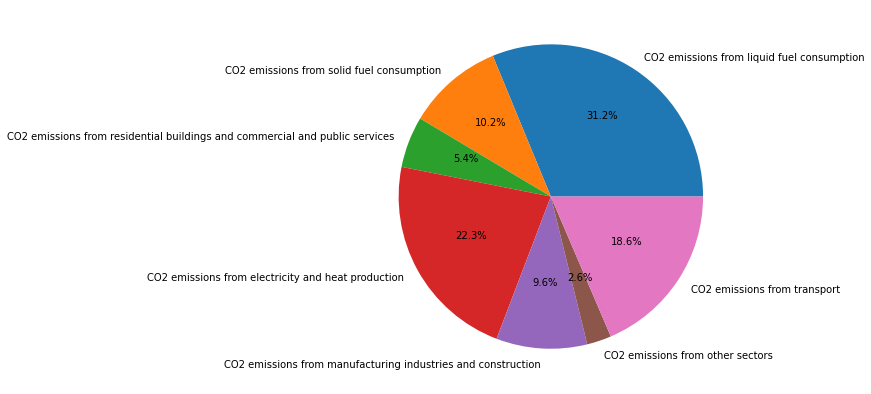

year: 2008


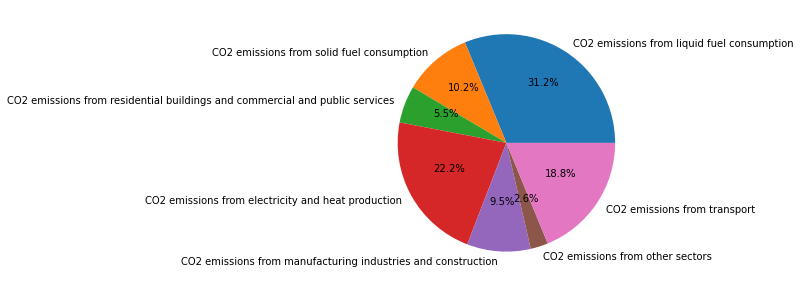

year: 2009


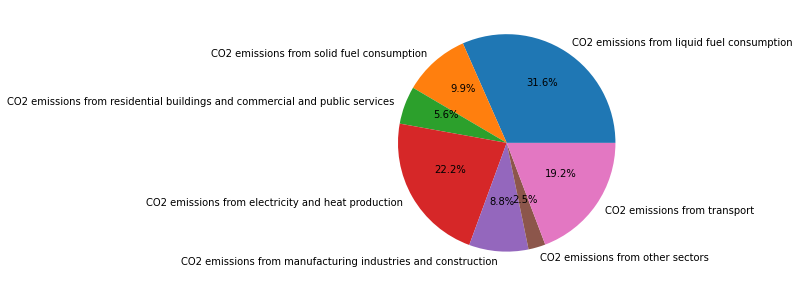

year: 2010


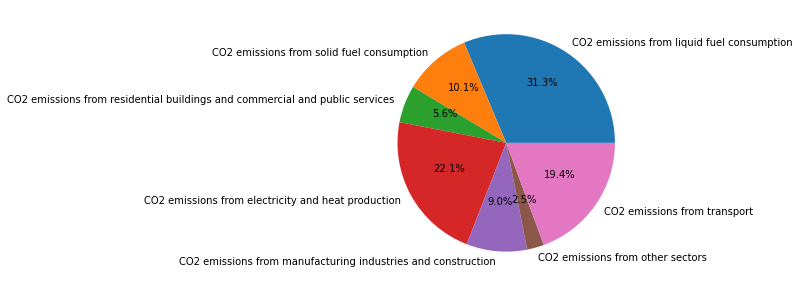

year: 2011


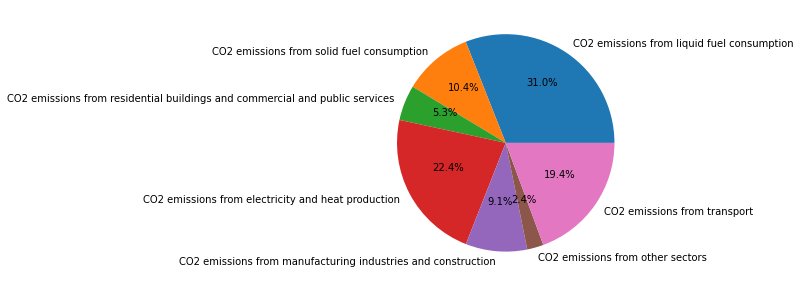

year: 2012


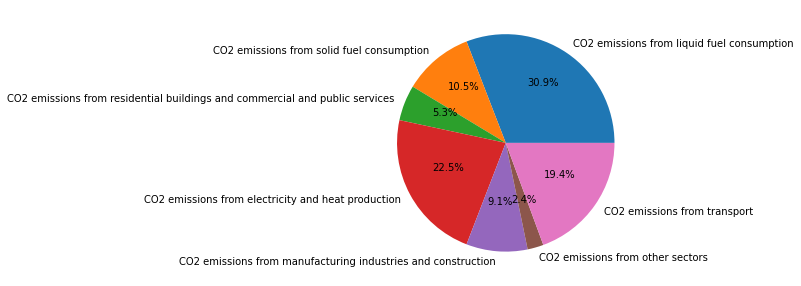

year: 2013


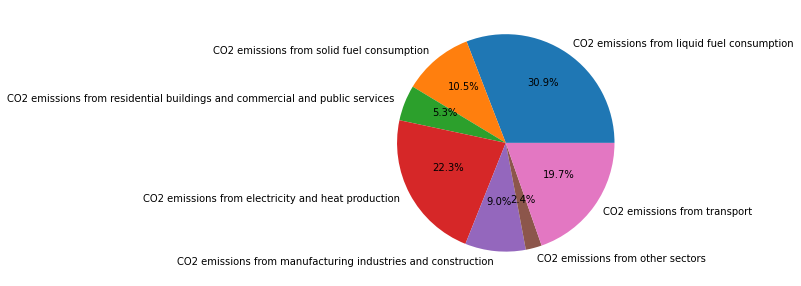

year: 2014


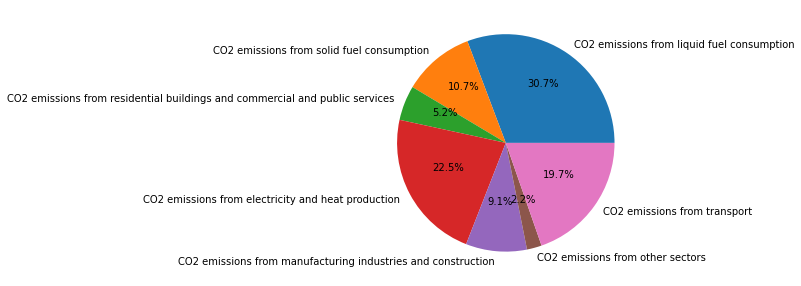

year: 2015


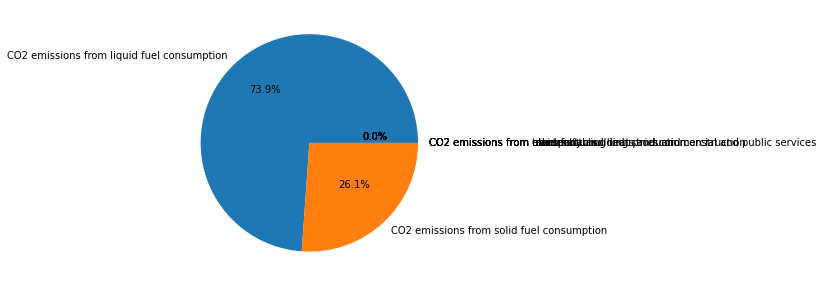

year: 2016


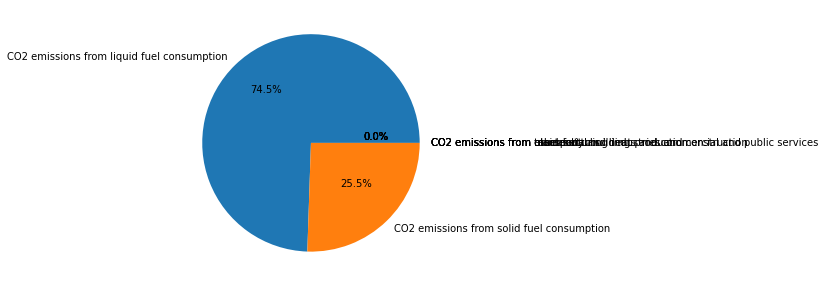

In [223]:
from matplotlib import pyplot as plt
import numpy as np
    
# Creating plot
fig = plt.figure(figsize =(10, 7))
for i in range(len(plot2)):
    print ('year:', int(plot2.iloc[i]['Year']))
    plt.pie(list(plot2[plot2.columns[1:]].iloc[i].values), labels = list(plot2.columns[1:]),
           autopct = lambda pct: func(pct, data))
    plt.show()

In [238]:
df = plot1[plot1['Year']==2014][['Year', 'Country Name', 'EN.ATM.CO2E.LF.ZS']].sort_values(
    by='EN.ATM.CO2E.LF.ZS',
    ascending=False).head(5).reset_index(drop=True)
df = df.rename(columns={'EN.ATM.CO2E.LF.ZS': 'CO2 emissions from liquid fuel consumption'})

In [239]:
df.head()

,Year,Country Name,CO2 emissions from liquid fuel consumption
0,2014,Haiti,96.475196
1,2014,Suriname,96.405229
2,2014,"Congo, Dem. Rep.",96.389325
3,2014,Cyprus,93.829401
4,2014,Nicaragua,92.554859


In [240]:
plot1.head()

,Country Name,Year,Country Code,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS
0,Albania,2007,ALB,86.087768,1.867414,7.407407,8.730159,16.931217,11.640212,55.555556
1,Algeria,2007,DZA,35.056142,2.755153,16.028285,40.011786,11.455510,0.000000,32.516205
2,Angola,2007,AGO,35.019682,0.000000,23.858921,12.344398,23.547718,0.311203,40.041494
3,Argentina,2007,ARG,44.535388,2.091227,14.616174,33.816513,20.510962,5.405569,25.644742
4,Armenia,2007,ARM,18.274112,0.145033,22.291667,22.500000,24.375000,8.750000,22.083333


In [243]:
country_data.head()

,Year,Country Name,Country Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
0,2007,Albania,ALB,11190.00,27400.0,28750.0,0.000000,2.517483,97.482517,0.000000,...,1.867414,7.407407,8.730159,16.931217,11.640212,55.555556,108.394781,1.761086,1517619.0,1452398.0
1,2007,Algeria,DZA,412520.00,2381740.0,2381740.0,0.000000,99.392408,0.607592,97.257770,...,2.755153,16.028285,40.011786,11.455510,0.000000,32.516205,14.345383,32.464934,11839539.0,22327433.0
2,2007,Angola,AGO,508468.17,1246700.0,1246700.0,0.000000,22.381100,77.618900,0.000000,...,0.000000,23.858921,12.344398,23.547718,0.311203,40.041494,16.768559,46.279012,8879762.0,12025601.0
3,2007,Argentina,ARG,1440330.00,2736690.0,2780400.0,2.179398,63.438998,28.270726,51.046874,...,2.091227,14.616174,33.816513,20.510962,5.405569,25.644742,14.500837,4.995813,3823185.0,35861110.0
4,2007,Armenia,ARM,17519.00,28470.0,29740.0,0.000000,25.245846,31.417430,25.245846,...,0.145033,22.291667,22.500000,24.375000,8.750000,22.083333,103.007306,0.009296,1063397.0,1869221.0


In [287]:
country_data_07_14= country_data[(country_data['Year']==2007) | (country_data['Year']==2016)][['Country Name', 'Year', 'EN.ATM.CO2E.PC']].reset_index(
    drop=True)

In [256]:
country_data_07_14

,Country Name,Year,EN.ATM.CO2E.PC
0,Albania,2007,1.322335
1,Algeria,2007,3.202067
2,Angola,2007,1.203134
3,Argentina,2007,4.414246
4,Armenia,2007,1.724327
...,...,...,...
257,"Venezuela, RB",2016,5.500713
258,Vietnam,2016,2.057566
259,"Yemen, Rep.",2016,0.390480
260,Zambia,2016,0.314183


In [288]:
country_data_07_14 = country_data_07_14.pivot(index='Country Name', columns='Year', values='EN.ATM.CO2E.PC')\
            .reset_index()
# country_data_07_14.columns.name=None

In [282]:
country_data_07_14.columns

Index(['Country Name', 2007, 2016], dtype='object', name='Year')

In [281]:
country_data_07_14[2007]

0      1.322335
1      3.202067
2      1.203134
3      4.414246
4      1.724327
         ...   
126    5.946848
127    1.227734
128    0.985390
129    0.154271
130    0.806649
Name: 2007, Length: 131, dtype: float64

In [298]:
country_data_07_14['percentage_change'] = 100.0 * (country_data_07_14[2016] - country_data_07_14[2007])/ country_data_07_14[2016]

In [299]:
country_data_07_14.sort_values(by='percentage_change',
    ascending=False).head()[['Country Name', 2007, 2016, 'percentage_change']].reset_index(drop=True)

Year,Country Name,2007,2016,percentage_change
0,Nepal,0.099102,0.333998,70.328507
1,Mozambique,0.104393,0.285402,63.422531
2,Cambodia,0.253313,0.629142,59.736712
3,Iraq,2.226903,5.191405,57.104033
4,"Congo, Rep.",0.313142,0.658897,52.474761


In [300]:
country_data_07_14.columns

Index(['Country Name', 2007, 2016, 'percentage_change'], dtype='object', name='Year')